In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%%capture
!pip install statsmodels==0.11.0
!pip install arch
%load_ext rpy2.ipython

In [3]:
%%capture
# %%R
# install.packages('tidyverse')
# install.packages('RMetrics')
# install.packages('rugarch')

In [4]:
import os
from glob import glob
import pandas as pd
from operator import attrgetter
import numpy as np
import statsmodels
import arch

* CPI MONTHLY CHOW TEST *

   level and log

In [5]:
path_1='/content/gdrive/MyDrive/Library/data_amar/cpi_inflation_amar/cpi_urban_monthly_136101_140006_base_95_no_detail.xlsx'

In [6]:
cpi_monthly=pd.read_excel(path_1).dropna(how='any')
cpi_monthly.iat[23,0]='1984-03-20'
cpi_monthly.iat[71,0]='1988-03-20'
cpi_monthly.iat[95,0]='1990-03-20'
cpi_monthly.iat[95,1]='1368-12-29'
cpi_monthly.iat[143,0]='1994-03-20'

In [75]:
cpi_monthly.loc[229]

date         2001-05-21 00:00:00
jdate                 1380-02-31
cpi_urban                9.54041
Name: 229, dtype: object

In [78]:
pd.set_option('display.max_rows',470)


TypeError: ignored

In [7]:

%%capture
!pip install chowtest
from chow_test import chow_test as chowtest

In [8]:
trim_index=int(cpi_monthly.cpi_urban.size*0.15)
trim_index

71

In [9]:
x=cpi_monthly.loc[:472]
y=cpi_monthly.shift(-1).dropna(how='all')

In [10]:

%%capture

indexes=[]
chow_stats=[]
p_values=[]

chow_stats_log=[]
p_values_log=[]

for index in range(71,403):
  chow_result_level = chowtest(x['cpi_urban'], y['cpi_urban'], index,index+1,0.05)
  chow_result_log = chowtest(np.log(x['cpi_urban']), np.log(y['cpi_urban']), index,index+1,0.05)
  indexes.append(index)
  chow_stats.append(chow_result_level[0])
  p_values.append(chow_result_level[1])
  
  chow_stats_log.append(chow_result_log[0])
  p_values_log.append(chow_result_log[1])

zipped=list(zip(indexes,chow_stats,p_values))
chow_df_level=pd.DataFrame(zipped, columns=['index', 'chow_stat','p_value'])

zipped_log=list(zip(indexes,chow_stats_log,p_values_log))
chow_df_log=pd.DataFrame(zipped_log, columns=['index','chow_stat','p_value'])

In [19]:
len(chow_df_level[chow_df_level.p_value<0.05])

289

In [20]:
len(chow_df_log[chow_df_log.p_value<=0.05])

8

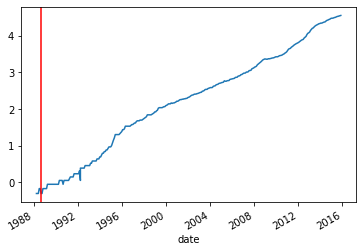

In [21]:
import matplotlib.pyplot as plt

cpi_plot=cpi_monthly.set_index(pd.to_datetime(cpi_monthly.date)).copy()
np.log(cpi_plot.cpi_urban.loc['1988-03-20':'2015-11-21']).plot()

plt.axvline('1988-08-22', color='red')

* CPI QUARTERLY CHOW TEST *

   level and log

In [22]:
cpi_quarterly=cpi_monthly.set_index(pd.to_datetime(cpi_monthly['date'])).resample('Q').mean()

In [23]:
x_=cpi_quarterly.iloc[:157,]
y_=cpi_quarterly.shift(-1).dropna(how='all')

In [24]:

%%capture

indexes_=[]
chow_stats_=[]
p_values_=[]

chow_stats_log_=[]
p_values_log_=[]

for index in range(24,133):
  chow_result_Qlevel = chowtest(x['cpi_urban'], y['cpi_urban'], index,index+1,0.05)
  chow_result_Qlog = chowtest(np.log(x['cpi_urban']), np.log(y['cpi_urban']), index,index+1,0.05)
  indexes_.append(index)
  chow_stats_.append(chow_result_Qlevel[0])
  p_values_.append(chow_result_Qlevel[1])
  
  chow_stats_log_.append(chow_result_Qlog[0])
  p_values_log_.append(chow_result_Qlog[1])

zipped_=list(zip(indexes_,chow_stats_,p_values_))
chow_df_Qlevel=pd.DataFrame(zipped_, columns=['index', 'chow_stat','p_value'])

zipped_log_=list(zip(indexes_,chow_stats_log_,p_values_log_))
chow_df_Qlog=pd.DataFrame(zipped_log_, columns=['index','chow_stat','p_value'])

In [25]:
len(chow_df_Qlevel[chow_df_Qlevel.p_value<0.05])

19

In [26]:
len(chow_df_Qlog[chow_df_Qlog.p_value<=0.05])

55

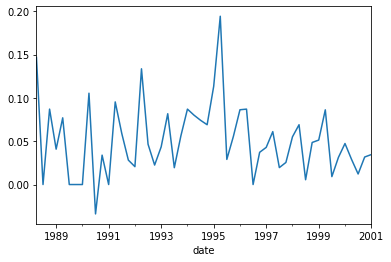

In [27]:
np.log(cpi_quarterly.cpi_urban).diff().iloc[24:76].plot()

* ADF TEST CPI MONTHLY *

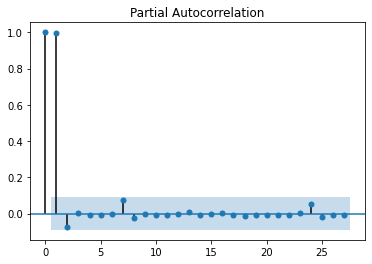

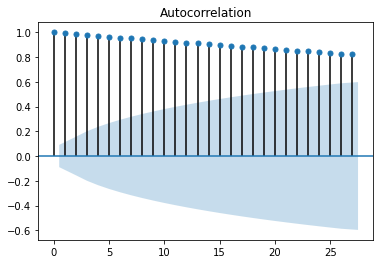

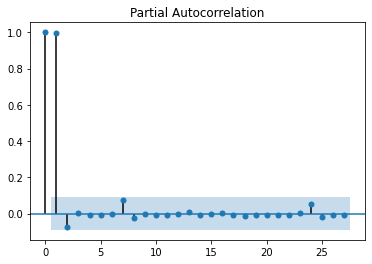

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(np.log(cpi_monthly.cpi_urban))
plot_pacf(np.log(cpi_monthly.cpi_urban))

In [29]:
from statsmodels.tsa.stattools import adfuller

adf_result=adfuller(np.log(cpi_monthly.cpi_urban))
print('adf_stat:', adf_result[0],'\n'
'p_value:', adf_result[1], '\n'
'used_lag:', adf_result[2],'\n'
'number_of_obs:', adf_result[3], '\n'
'critical_values:', adf_result[4],'\n'
'max_info_criterea:', adf_result[5],'\n'
)

adf_stat: 0.15238874826105664 
p_value: 0.9694611801648643 
used_lag: 18 
number_of_obs: 455 
critical_values: {'1%': -3.4448040131772584, '5%': -2.8679131843980197, '10%': -2.5701646673107112} 
max_info_criterea: -1796.0588033152162 



In [30]:

#monthly_inflation_adf_test

adf_result=adfuller(
np.log(cpi_monthly.cpi_urban).diff().iloc[1:])

print('adf_stat:', adf_result[0],'\n'
'p_value:', adf_result[1], '\n'
'used_lag:', adf_result[2],'\n'
'number_of_obs:', adf_result[3], '\n'
'critical_values:', adf_result[4],'\n'
'max_info_criterea:', adf_result[5],'\n'
)

adf_stat: -3.18594782108106 
p_value: 0.02081261973669024 
used_lag: 17 
number_of_obs: 455 
critical_values: {'1%': -3.4448040131772584, '5%': -2.8679131843980197, '10%': -2.5701646673107112} 
max_info_criterea: -1793.052477283526 



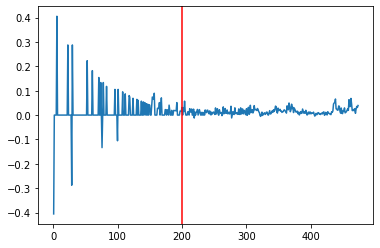

In [31]:
import matplotlib.pyplot as plt
np.log(cpi_monthly.cpi_urban).diff().iloc[1:].plot()
plt.axvline(200, color='red') #1377-09-30

* KPSS TEST *

In [32]:

# %%capture
from statsmodels.tsa.stattools import kpss
kpss_result=kpss(cpi_monthly.cpi_urban,'c')
kpss_trend=kpss(cpi_monthly.cpi_urban, 'ct')

kpss_result_log=kpss(np.log(cpi_monthly.cpi_urban),'c')
kpss_trend_log=kpss(np.log(cpi_monthly.cpi_urban), 'ct')

kpss_Qresult=kpss(cpi_quarterly.cpi_urban,'c')
kpss_Qtrend=kpss(cpi_quarterly.cpi_urban, 'ct')

kpss_result_Qlog=kpss(np.log(cpi_quarterly.cpi_urban),'c')
kpss_trend_Qlog=kpss(np.log(cpi_quarterly.cpi_urban), 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-valu

In [33]:
print('ts: cpi_monthly_level','\n'
'H0: stationary around constant','\n'
 'kpss_stat:' ,kpss_result[0],'\n'
'p_value:' ,kpss_result[1], '\n'
'lag:' ,kpss_result[2],'\n'
'critical_values:' ,kpss_result[3])

ts: cpi_monthly_level 
H0: stationary around constant 
kpss_stat: 1.6931462763368834 
p_value: 0.01 
lag: 18 
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [34]:
print('ts: cpi_monthly_level','\n'
'H0: stationary around trend','\n'
 'kpss_stat:' ,kpss_trend[0],'\n'
'p_value:' ,kpss_trend[1], '\n'
'lag:' ,kpss_trend[2],'\n'
'critical_values:' ,kpss_trend[3])

ts: cpi_monthly_level 
H0: stationary around trend 
kpss_stat: 0.47653104011831143 
p_value: 0.01 
lag: 18 
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [35]:
print('ts: cpi_monthly_log','\n'
'H0: stationary around constant','\n'
 'kpss_stat:' ,kpss_result_log[0],'\n'
'p_value:' ,kpss_result_log[1], '\n'
'lag:' ,kpss_result_log[2],'\n'
'critical_values:' ,kpss_result_log[3])

ts: cpi_monthly_log 
H0: stationary around constant 
kpss_stat: 2.5818426048877345 
p_value: 0.01 
lag: 18 
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [36]:
print('ts: cpi_monthly_log','\n'
'H0: stationary around trend','\n'
 'kpss_stat:' ,kpss_trend_log[0],'\n'
'p_value:' ,kpss_trend_log[1], '\n'
'lag:' ,kpss_trend_log[2],'\n'
'critical_values:' ,kpss_trend_log[3])

ts: cpi_monthly_log 
H0: stationary around trend 
kpss_stat: 0.3267009579267467 
p_value: 0.01 
lag: 18 
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [37]:
print('ts: cpi_quarterly_level','\n'
'H0: stationary around constant','\n'
'kpss_stat:' ,kpss_Qresult[0],'\n'
'p_value:' ,kpss_Qresult[1], '\n'
'lag:' ,kpss_Qresult[2],'\n'
'critical_values:' ,kpss_Qresult[3])

ts: cpi_quarterly_level 
H0: stationary around constant 
kpss_stat: 0.8473291938262428 
p_value: 0.01 
lag: 14 
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [38]:
print('ts: cpi_quarterly_level','\n'
'H0: stationary around trend','\n'
'kpss_stat:' ,kpss_Qtrend[0],'\n'
'p_value:' ,kpss_Qtrend[1], '\n'
'lag:' ,kpss_Qtrend[2],'\n'
'critical_values:' ,kpss_Qtrend[3])

ts: cpi_quarterly_level 
H0: stationary around trend 
kpss_stat: 0.2530464044453342 
p_value: 0.01 
lag: 14 
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [39]:
print('ts: cpi_quarterly_log','\n'
'H0: stationary around constant','\n'
'kpss_stat:' ,kpss_result_Qlog[0],'\n'
'p_value:' ,kpss_result_Qlog[1], '\n'
'lag:' ,kpss_result_Qlog[2],'\n'
'critical_values:' ,kpss_result_Qlog[3])

ts: cpi_quarterly_log 
H0: stationary around constant 
kpss_stat: 1.1588688865077283 
p_value: 0.01 
lag: 14 
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [40]:
print('ts: cpi_quarterly_log','\n'
'H0: stationary around trend','\n'
'kpss_stat:' ,kpss_trend_Qlog[0],'\n'
'p_value:' ,kpss_trend_Qlog[1], '\n'
'lag:' ,kpss_trend_Qlog[2],'\n'
'critical_values:' ,kpss_trend_Qlog[3])

#cpi_quarterly_log is trend stationary at 95%

ts: cpi_quarterly_log 
H0: stationary around trend 
kpss_stat: 0.1650354585519956 
p_value: 0.03413711787333698 
lag: 14 
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [41]:
%%capture
#inflaton kpss test
minflation=np.log(cpi_monthly.cpi_urban).diff().iloc[1:]

minflation_kpss_constant=kpss(minflation,'c')
minflation_kpss_trend=kpss(minflation, 'ct')

In [42]:
print('ts: inflation_monthly','\n'
'H0: stationary around constant','\n'
'kpss_stat:' , minflation_kpss_constant[0],'\n'
'p_value:' ,minflation_kpss_constant[1], '\n'
'lag:' ,minflation_kpss_constant[2],'\n'
'critical_values:' ,minflation_kpss_constant[3])

ts: inflation_monthly 
H0: stationary around constant 
kpss_stat: 0.12363220463861059 
p_value: 0.1 
lag: 18 
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [43]:
print('ts: inflation_monthly','\n'
'H0: stationary around trend','\n'
'kpss_stat:' , minflation_kpss_trend[0],'\n'
'p_value:' ,minflation_kpss_trend[1], '\n'
'lag:' ,minflation_kpss_trend[2],'\n'
'critical_values:' ,minflation_kpss_trend[3])

ts: inflation_monthly 
H0: stationary around trend 
kpss_stat: 0.09219801045207653 
p_value: 0.1 
lag: 18 
critical_values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


* CPI MONTHLY ARIMA MODEL*

In [44]:
from statsmodels.tsa.ar_model import ar_select_order
order=ar_select_order(cpi_monthly.cpi_urban, maxlag=100)
order.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [45]:
from statsmodels.tsa.ar_model import AutoReg
mcpi_ar=AutoReg(cpi_monthly.cpi_urban, lags=10).fit()
mcpi_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              cpi_urban   No. Observations:                  474
Model:                    AutoReg(10)   Log Likelihood                -605.158
Method:               Conditional MLE   S.D. of innovations              0.892
Date:                Wed, 22 Dec 2021   AIC                             -0.178
Time:                        11:36:38   BIC                             -0.071
Sample:                            10   HQIC                            -0.136
                                  474                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -0.0721      0.051     -1.422      0.155      -0.172       0.027
cpi_urban.L1      1.5212      0.046     33.400      0.000       1.432       1.610
cpi_urban.L2     -0.5212      0.083     -6.276      0.000      -0.684      -0.358
cpi_urban.L3      0.4269      0.086      4.937      0.000       0.257       0.596
cpi_urban.L4     -0.6261      0.088     -7.123      0.000      -0.798      -0.454
cpi_urban.L5      0.2831      0.094      3.002      0.003       0.098       0.468
cpi_urban.L6     -0.3631      0.099     -3.655      0.000      -0.558      -0.168
cpi_urban.L7      0.3346      0.097      3.457      0.001       0.145       0.524
cpi_urban.L8     -0.1158      0.096     -1.208      0.227      -0.304       0.072
cpi_urban.L9      0.3415      0.093      3.682      0.000       0.160       0.523
cpi_urban.L10    -0.2736      0.051     -5.344      0.000      -0.374      -0.173
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0336           -0.5789j            1.1847           -0.4187
AR.2            -1.0336           +0.5789j            1.1847            0.4187
AR.3            -0.5482           -1.0506j            1.1850           -0.3265
AR.4            -0.5482           +1.0506j            1.1850            0.3265
AR.5             0.1936           -1.1617j            1.1777           -0.2237
AR.6             0.1936           +1.1617j            1.1777            0.2237
AR.7             0.9680           -0.5428j            1.1098           -0.0813
AR.8             0.9680           +0.5428j            1.1098            0.0813
AR.9             0.9743           -0.0000j            0.9743           -0.0000
AR.10            1.1142           -0.0000j            1.1142           -0.0000
------------------------------------------------------------------------------
"""

In [46]:
from statsmodels.tsa.arima_model import ARIMA
mcpi_arima=ARIMA(cpi_monthly.cpi_urban,order=[2,1,2]).fit()
mcpi_arima.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.cpi_urban   No. Observations:                  473
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -648.836
Method:                       css-mle   S.D. of innovations              0.951
Date:                Wed, 22 Dec 2021   AIC                           1309.673
Time:                        11:36:39   BIC                           1334.627
Sample:                             1   HQIC                          1319.488
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1730      2.157      1.007      0.314      -2.055       6.401
ar.L1.D.cpi_urban     0.3671      0.057      6.480      0.000       0.256       0.478
ar.L2.D.cpi_urban     0.6176      0.054     11.511      0.000       0.512       0.723
ma.L1.D.cpi_urban     0.3187      0.063      5.035      0.000       0.195       0.443
ma.L2.D.cpi_urban    -0.5230      0.050    -10.489      0.000      -0.621      -0.425
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0095           +0.0000j            1.0095            0.0000
AR.2           -1.6039           +0.0000j            1.6039            0.5000
MA.1           -1.1113           +0.0000j            1.1113            0.5000
MA.2            1.7205           +0.0000j            1.7205            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
#monthly logarithm of CPI is stationary and AR(2)

mcpi_log_order=ar_select_order(np.log(cpi_monthly.cpi_urban), maxlag=12)
mcpi_log_order.ar_lags

array([1, 2])

In [48]:
#this is the only linear model yet

mcpi_log_ar=AutoReg(cpi_monthly.cpi_urban, lags=2).fit()
mcpi_log_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              cpi_urban   No. Observations:                  474
Model:                     AutoReg(2)   Log Likelihood                -656.538
Method:               Conditional MLE   S.D. of innovations              0.972
Date:                Wed, 22 Dec 2021   AIC                             -0.039
Time:                        11:36:39   BIC                             -0.004
Sample:                             2   HQIC                            -0.025
                                  474                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.1065      0.053     -2.001      0.045      -0.211      -0.002
cpi_urban.L1     1.5740      0.040     39.565      0.000       1.496       1.652
cpi_urban.L2    -0.5624      0.041    -13.802      0.000      -0.642      -0.483
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9750           +0.0000j            0.9750            0.0000
AR.2            1.8237           +0.0000j            1.8237            0.0000
-----------------------------------------------------------------------------
"""

* Dirbin_Watson Test cpi monthly log

In [49]:

#monthly cpi logarithm has no serial correlation in residuals

from statsmodels.stats.stattools import durbin_watson as dw
dw(mcpi_log_ar.resid)

2.08169311591797

* heteroscedasticity test

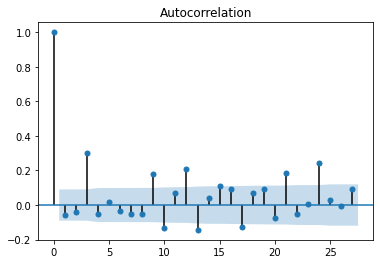

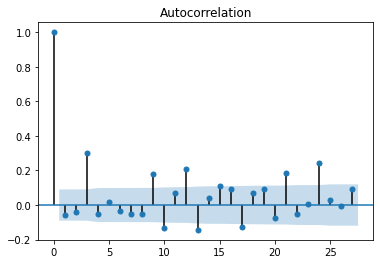

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mcpi_log_ar.resid)

In [51]:
#bereusch_pagan test of monthly cpi log; THERE IS STRONG HETEROSKEDASCITY

from statsmodels.stats.diagnostic import het_breuschpagan as bp_test_
exogs=pd.concat([np.log(cpi_monthly.cpi_urban.shift(-1)),np.log(cpi_monthly.cpi_urban.shift(-2))],axis=1)
bp_test=bp_test_(mcpi_log_ar.resid,exogs.iloc[:472])
print('test: Bereusch_Pagan', '\n'
'H0: homoskedasticity', '\n'
'bp_stat: ', bp_test[0], '\n'
'bp_p_value: ', bp_test[1],'\n'
'f_stat: ', bp_test[2],'\n'
'f_p_value: ', bp_test[3], '\n')

test: Bereusch_Pagan 
H0: homoskedasticity 
bp_stat:  35.43854224382547 
bp_p_value:  2.632262587253653e-09 
f_stat:  19.076483458029678 
f_p_value:  1.0821742541791363e-08 



In [52]:
# mcpi_log_ar.resid.iloc[0]^2
np.power(mcpi_log_ar.resid.iloc[0],2)

0.026566464153881832

In [53]:
#Ljung_Box test of resid^2
#monthly cpi log AR(2) residuals have NO serial correlation between any two lags

from statsmodels.stats.diagnostic import acorr_ljungbox
resid_square = [np.power(s,2) for s in mcpi_log_ar.resid]
lb_test=acorr_ljungbox(resid_square)
lb_test[1]<0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [54]:
#ARCH effect test (Engle's test)
#monthly cpi log AR(2) residulas volatility is changing over time

from statsmodels.stats.diagnostic import het_arch
arch_test=het_arch(mcpi_log_ar.resid)

print("test: Engle's test for ARCH effect",'\n'
'H0: NO conditional hetroskedasticity', '\n'
'Engle_stat: ',arch_test[0], '\n'
'p_value: ', arch_test[1], '\n'
'Engle_f_stat: ', arch_test[2], '\n'
'f_p_value: ', arch_test[3],'\n')

test: Engle's test for ARCH effect 
H0: NO conditional hetroskedasticity 
Engle_stat:  230.58609379870586 
p_value:  7.058396210055682e-39 
Engle_f_stat:  24.942481699332006 
f_p_value:  7.059410572170426e-56 



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:625: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  FutureWarning)


In [ ]:
# %%R
# library('rugarch')

In [56]:
#GLS estimation of monthly cpi log; AR(2) IS MISESPECIFIED, AR(1) IS SIGNIFICANT
#in order to dump heteroskedasticity, gls is used

from statsmodels.regression.linear_model import GLS

mcpi_log=np.log(cpi_monthly.cpi_urban).iloc[:472]
mcpi_log_ar_gls = GLS(endog=mcpi_log, exog=exogs.iloc[:472]).fit()
mcpi_log_ar_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:              cpi_urban   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.036e+06
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                        0.00
Time:                        11:36:58   Log-Likelihood:                          803.54
No. Observations:                 472   AIC:                                     -1603.
Df Residuals:                     470   BIC:                                     -1595.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cpi_urban      0.9355      0.051     18.474      0.000       0.836       1.035
cpi_urban      0.0601      0.050      1.192      0.234      -0.039       0.159
==============================================================================
Omnibus:                      262.946   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35608.576
Skew:                          -1.355   Prob(JB):                         0.00
Kurtosis:                      45.465   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#bereusch_pagan test of monthly cpi log WITH GLS (AR_2); there is STRONG HETEROSKEDASCITY yet
#GLS does not work to dump heteroskedasticity

from statsmodels.stats.diagnostic import het_breuschpagan as bp_test_
exogs=pd.concat([np.log(cpi_monthly.cpi_urban.shift(-1)),np.log(cpi_monthly.cpi_urban.shift(-2))],axis=1)
bp_test_gls=bp_test_(mcpi_log_ar_gls.resid,exogs.iloc[:472])
print('test: Bereusch_Pagan', '\n'
'H0: homoskedasticity', '\n'
'bp_stat: ', bp_test_gls[0], '\n'
'bp_p_value: ', bp_test_gls[1],'\n'
'f_stat: ', bp_test_gls[2],'\n'
'f_p_value: ', bp_test_gls[3], '\n')

test: Bereusch_Pagan 
H0: homoskedasticity 
bp_stat:  5.871607874886368 
bp_p_value:  0.015386991907871182 
f_stat:  2.960188381376139 
f_p_value:  0.052775964523685555 



* Trend stationary regression *

In [58]:
cpi_quarterly_log = np.log(cpi_quarterly)

In [59]:
len(cpi_quarterly)
time=np.arange(0,158)
cpi_quarterly['time']=time

In [62]:
import statsmodels.formula.api as smf
qcpi_trend=smf.ols('cpi_urban~time', cpi_quarterly).fit()
qcpi_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cpi_urban   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           5.46e-30
Time:                        11:51:26   Log-Likelihood:                -815.32
No. Observations:                 158   AIC:                             1635.
Df Residuals:                     156   BIC:                             1641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.7583      6.718     -6.514      0.000     -57.028     -30.489
time           1.0530      0.074     14.231      0.000       0.907       1.199
==============================================================================
Omnibus:                       95.186   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.081
Skew:                           2.275   Prob(JB):                    6.27e-107
Kurtosis:                      10.320   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""